In [1]:
import pandas as pd, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, calendar, time
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.ticker
%matplotlib inline

In [2]:
PLACE = "detroit_michigan"

Read in the versions file

In [25]:
header = ['user',"changeset","road_km_added","road_km_modified","waterway_km_added","waterway_km_modified","roads_added","roads_modified","waterways_added","waterways_modified","buildings_added","buildings_modified","parking_aisle_km_added","parking_aisle_km_modified","parking_aisles_added","parking_aisles_modified","service_road_km_added","service_road_km_modified","service_roads_added","service_roads_modified","driveway_km_added","driveway_km_modified","driveways_added","driveways_modified","sidewalk_km_added","sidewalk_km_modified","sidewalks_added","sidewalks_modified","lane_km_added","lane_km_modified","lanes_added","lanes_modified","cycleway_km_added","cycleway_km_modified","cycleways_added","cycleways_modified","traffic_signs_added","traffic_signs_modified","traffic_signals_added","traffic_signals_modified","manholes_added","manholes_modified","flagpoles_added","flagpoles_modified","bollards_added","bollards_modified","surveillance_added","surveillance_modified","vending_machines_added","vending_machines_modified","pois_added","pois_modified","parks_added","parks_modified","addresses_added","addresses_modified","parking_added","parking_modified","swimming_pools_added","swimming_pools_modified","barriers_added","barriers_modified","bike_parking_added","bike_parking_modified","shelters_added","shelters_modified","crossings_added","crossings_modified"]

In [50]:
df = pd.read_csv('../data/changeset_stats-'+PLACE+'-20180930.csv',names=header, sep=',',index_col=False)
df.sort_values(by='changeset').reindex()
df.head(2)

,user,changeset,road_km_added,road_km_modified,waterway_km_added,waterway_km_modified,roads_added,roads_modified,waterways_added,waterways_modified,...,swimming_pools_added,swimming_pools_modified,barriers_added,barriers_modified,bike_parking_added,bike_parking_modified,shelters_added,shelters_modified,crossings_added,crossings_modified
0,7168,76848,2406.492787,0.0,0.0,0.0,5319,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1399,238703,0.000000,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
"Found {:,} changesets by {:,} users".format( df.changeset.count(), df.user.nunique() )

'Found 87,824 changesets by 3,346 users'

# 1. Kilometers of roads added vs. edited over time

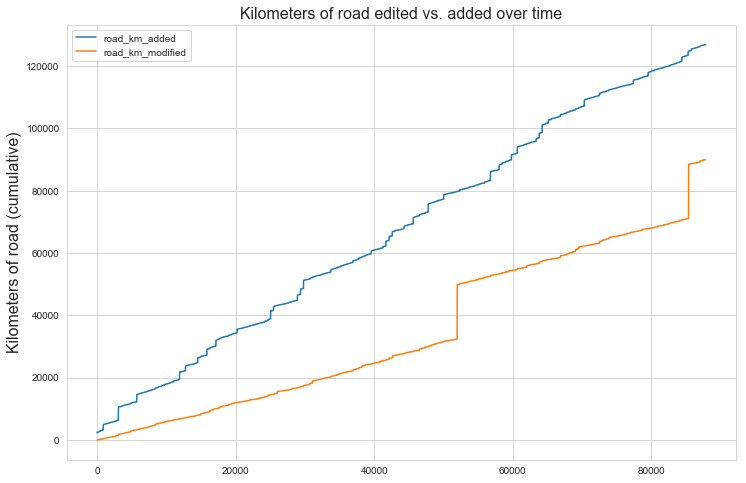

In [67]:
sns.set_style('whitegrid')
ax = df[['road_km_added','road_km_modified']].cumsum().plot(figsize=(12,8))
# hw[hw.version>1].groupby('date').aggregate({'length':sum}).cumsum().plot(ax=ax,legend=None)
ax.set_ylabel("Kilometers of road (cumulative)",fontsize=16)
ax.set_title("Kilometers of road edited vs. added over time",fontsize=16);
# ax.legend(['Added','Edited'], loc=0, fontsize=12);

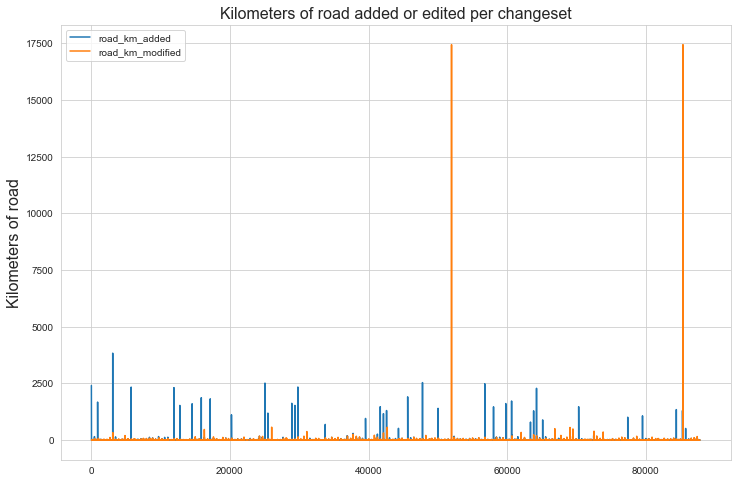

In [70]:
sns.set_style('whitegrid')
ax = df[['road_km_added','road_km_modified']].plot(figsize=(12,8))
ax.set_ylabel("Kilometers of road",fontsize=16)
ax.set_title("Kilometers of road added or edited per changeset",fontsize=16);

We see a fairly equitable distribution per changeset here, with no single changeset submitting more than 5k km of roads (even initial imports).

# 2 Buildings over time

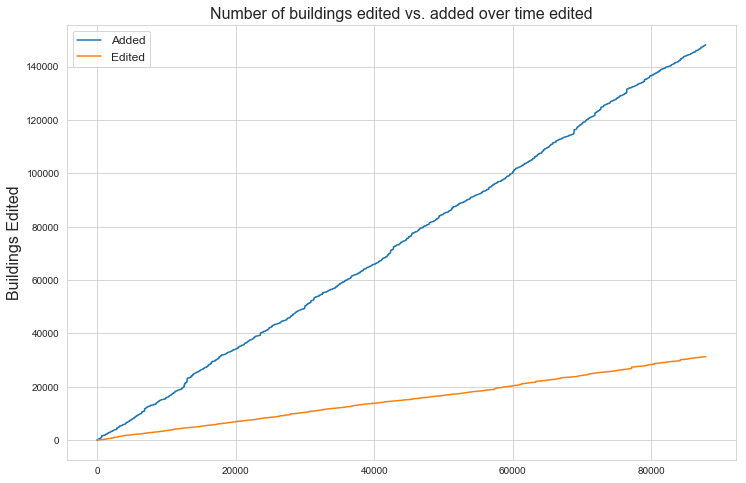

In [63]:
sns.set_style('whitegrid')
ax = df[['buildings_added','buildings_modified']].cumsum().plot(figsize=(12,8),legend=None)
ax.set_ylabel("Buildings Edited",fontsize=16)
ax.set_title("Number of buildings edited vs. added over time edited",fontsize=16);
ax.legend(['Added','Edited'], loc=0, fontsize=12);

# 3 What about POIs?

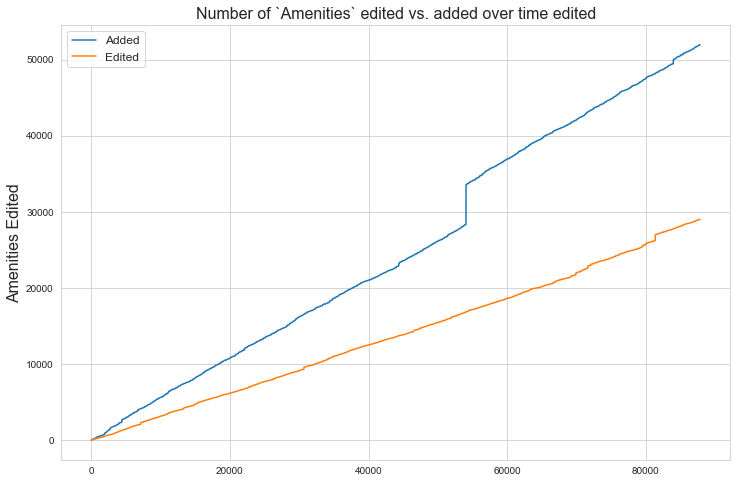

In [64]:
sns.set_style('whitegrid')
ax = df[['pois_added','pois_modified']].cumsum().plot(figsize=(12,8),legend=None)
ax.set_ylabel("Amenities Edited",fontsize=16)
ax.set_title("Number of `Amenities` edited vs. added over time edited",fontsize=16);
ax.legend(['Added','Edited'], loc=0, fontsize=12);

# 4. Parks

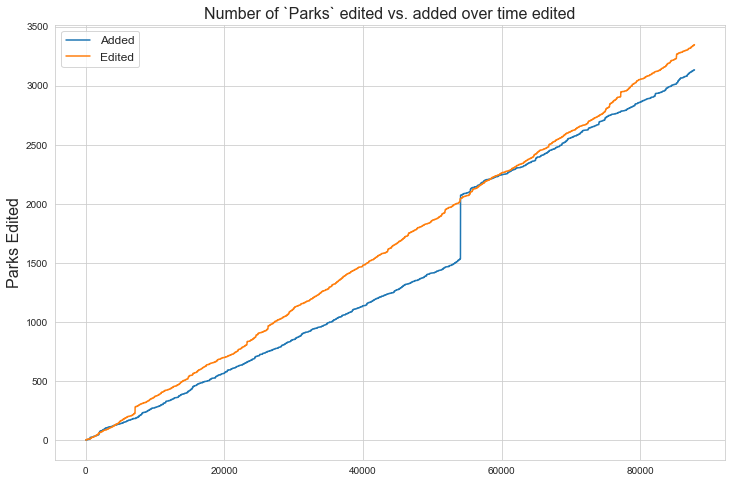

In [59]:
sns.set_style('whitegrid')
ax = df[['parks_added','parks_modified']].cumsum().plot(figsize=(12,8),legend=None)
ax.set_ylabel("Parks Edited",fontsize=16)
ax.set_title("Number of `Parks` edited vs. added over time edited",fontsize=16);
ax.legend(['Added','Edited'], loc=0, fontsize=12);